In [1]:
import math

import statistics

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import glob 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
os.chdir("D://Business analytics//Excel class//Python//files")

In [4]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv")) 
append_data = []
for x in csv_files:
    df = pd.read_csv(x)
    df.columns = df.iloc[1]
    df = df.iloc[2:].reset_index(drop= True)
    append_data.append(df)
df_final = pd.concat(append_data)
df_final = df_final[['Date','channelKey', 'ProductKey','UnitCost', 'UnitPrice', 'SalesQuantity','ReturnQuantity', 'ReturnAmount', 'DiscountQuantity', 'DiscountAmount',
       'TotalCost', 'SalesAmount', 'GeographyKey']]

C:\Users\om\AppData\Local\Temp\ipykernel_9252\1259949939.py:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(x)
C:\Users\om\AppData\Local\Temp\ipykernel_9252\1259949939.py:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(x)
C:\Users\om\AppData\Local\Temp\ipykernel_9252\1259949939.py:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(x)


In [5]:
xls = pd.ExcelFile('lookup1.xlsx')
df1 = pd.read_excel(xls, 'Product')
df2 = pd.read_excel(xls, 'Geography')
df3 = pd.read_excel(xls, 'Channel')

In [6]:
df_final[["channelKey",'ProductKey','GeographyKey']]= df_final[["channelKey",'ProductKey','GeographyKey']].astype(int)
df_final[['UnitCost', 'UnitPrice',
       'SalesQuantity', 'ReturnQuantity', 'ReturnAmount', 'DiscountQuantity',
       'DiscountAmount', 'TotalCost', 'SalesAmount']] = df_final[['UnitCost', 'UnitPrice',
       'SalesQuantity', 'ReturnQuantity', 'ReturnAmount', 'DiscountQuantity',
       'DiscountAmount', 'TotalCost', 'SalesAmount']].astype(float)
df_final1 = pd.merge(df_final,df3,how = "left",left_on='channelKey', right_on='ChannelKey')
df_final1 = pd.merge(df_final1,df2,how = "left",left_on='GeographyKey', right_on='GeographyKey')
df_final1 = pd.merge(df_final1,df1,how = "left",left_on='ProductKey', right_on='ProductKey')
df_final1 = df_final1.drop(columns= ['channelKey','GeographyKey','ProductKey'])

In [7]:
Stat = df_final1[['Date', 'UnitCost', 'UnitPrice','TotalCost',
       'SalesAmount']]
Stat = Stat.set_index("Date")
Stat[['UnitCost', 'UnitPrice','TotalCost',
       'SalesAmount']] = Stat[['UnitCost', 'UnitPrice','TotalCost',
       'SalesAmount']].astype(int)

In [8]:
Stat

,UnitCost,UnitPrice,TotalCost,SalesAmount
Date,,,,
01-01-2014,73,159,658,1431
01-01-2014,509,999,1527,2847
01-01-2014,16,32,65,116
01-01-2014,105,230,1903,4128
01-01-2014,1,3,136,268
...,...,...,...,...
31-12-2016,208,629,1667,4654
31-12-2016,222,673,1337,3634
31-12-2016,123,268,1602,3269


In [9]:
df_final1

,Date,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ChannelKey,ChannelName,ContinentName,ProductName,Sub category,Category
0,01-01-2014,73.12,159.00,9.0,0.0,0.00,0.0,0.000,658.08,1431.000,1,Store,North America,Proseware Photo Ink Jet Printer M100 White,"Printers, Scanners & Fax",Computers
1,01-01-2014,509.32,999.00,3.0,1.0,999.00,1.0,149.850,1527.96,2847.150,1,Store,Asia,Litware Washer & Dryer 15.5in E150 Green,Washers & Dryers,Home Appliances
2,01-01-2014,16.31,32.00,4.0,0.0,0.00,7.0,11.200,65.24,116.800,2,Online,North America,MGS Age of Empires II: The Conquerors Expansio...,Download Games,Games and Toys
3,01-01-2014,105.77,230.00,18.0,0.0,0.00,1.0,11.500,1903.86,4128.500,2,Online,North America,"The Phone Company Touch Screen Phones 26-2.2"" ...",Touch Screen Phones,Cell phones
4,01-01-2014,1.71,3.35,80.0,1.0,3.35,0.0,0.000,136.80,268.000,1,Store,North America,Contoso In-Line Coupler E180 Silver,Cell phones Accessories,Cell phones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859500,31-12-2016,208.40,629.00,8.0,0.0,0.00,3.0,377.400,1667.20,4654.600,1,Store,Europe,Fabrikam SLR Camera X146 Black,Digital SLR Cameras,Cameras and camcorders
859501,31-12-2016,222.98,673.00,6.0,0.0,0.00,3.0,403.800,1337.88,3634.200,1,Store,North America,Contoso SLR Camera X144 Gold,Digital SLR Cameras,Cameras and camcorders
859502,31-12-2016,123.24,268.00,13.0,0.0,0.00,4.0,214.400,1602.12,3269.600,3,Catalog,North America,"The Phone Company Touch Screen Phones 26-1.4"" ...",Touch Screen Phones,Cell phones
859503,31-12-2016,210.72,635.99,24.0,1.0,635.99,10.0,953.985,5057.28,14309.775,2,Online,Asia,Adventure Works Floor Lamp X1150 Silver,Lamps,Home Appliances


# outliers removal

In [10]:
#Numpy quantile method
box_plot = [1,1,3,4,1,2,4,52,4,2,15,21]
x = np.quantile(box_plot,[0,0.25,0.50,0.75,1])

In [11]:
x

array([ 1.  ,  1.75,  3.5 ,  6.75, 52.  ])

In [12]:
statistics.median(box_plot)

3.5

<Axes: >

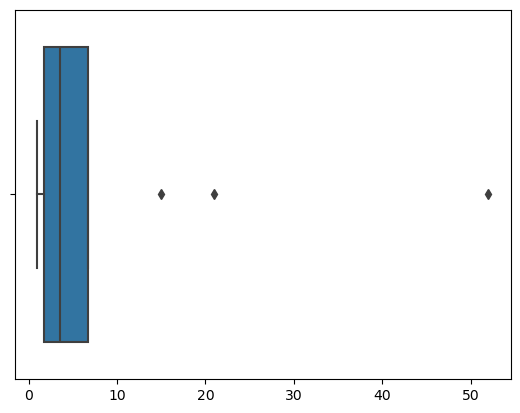

In [13]:
sns.boxplot(x = box_plot)

In [14]:
statistics.median(Stat["UnitCost"])

84

<Axes: xlabel='UnitCost'>

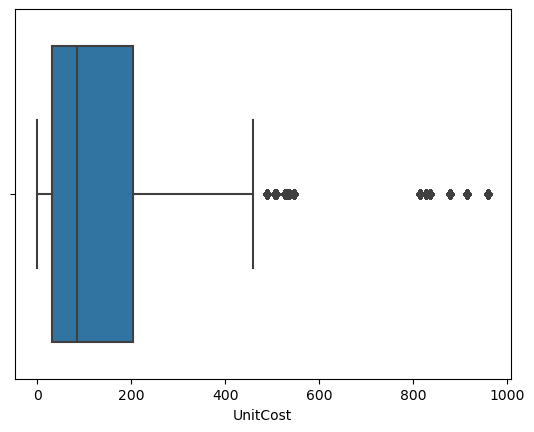

In [15]:
sns.boxplot(x = Stat["UnitCost"])

In [16]:
Stat.describe()

,UnitCost,UnitPrice,TotalCost,SalesAmount
count,859505.000000,859505.000000,859505.000000,859505.000000
mean,139.363512,333.347903,1601.002135,3779.815417
std,167.467721,429.194189,2104.667639,5318.017167
min,0.000000,0.000000,1.000000,3.000000
25%,32.000000,69.000000,314.000000,657.000000
50%,84.000000,188.000000,919.000000,2080.000000
75%,204.000000,445.000000,2107.000000,4990.000000
max,960.000000,2899.000000,91411.000000,272718.000000


In [17]:
for x in ['UnitCost']:
    q75,q25 = np.percentile(Stat.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    Stat.loc[Stat[x] < min,x] = np.nan
    Stat.loc[Stat[x] > max,x] = np.nan

In [18]:
Stat=Stat.dropna(axis=0)

<Axes: xlabel='UnitCost'>

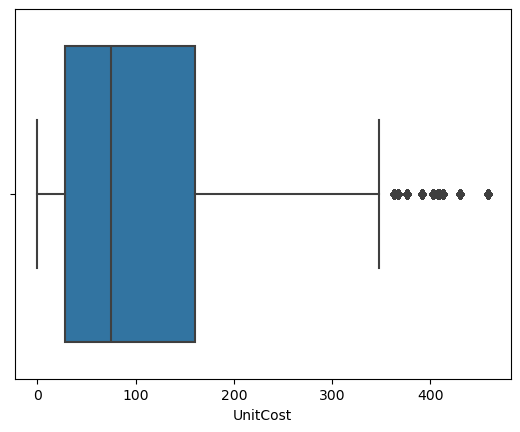

In [19]:
sns.boxplot(x = Stat["UnitCost"])

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


MemoryError: Unable to allocate 4.83 GiB for an array with shape (648691098,) and data type object

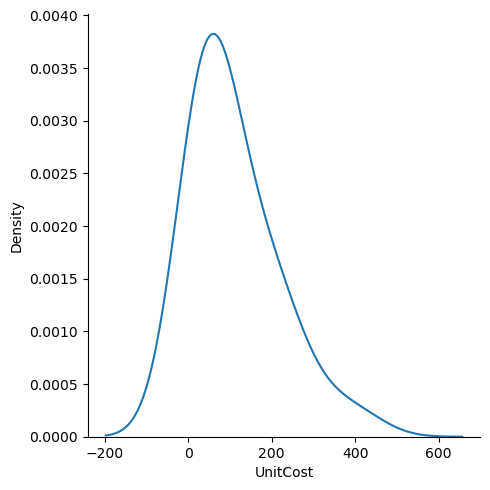

In [20]:
sns.displot(Stat,x= "UnitCost", kind = "kde",bw_adjust = 10)

In [21]:
data = [1,1,2,2,1,1,2,1,1,15,1,2,1,2,3,4,2]
mean = statistics.mean(data)
stdev = statistics.stdev(data)
print(mean)
print(stdev)

2.4705882352941178
3.337619792959189


In [22]:
#eliminate way of removing the outliners from the data
threshold = 3
outliner =[]
for i in  data:
    z = (i-mean)/stdev
    if z > threshold:
        outliner.append(i)
print("The outliner value is {}".format(outliner))

The outliner value is [15]


In [23]:
unitcost = df_final["UnitCost"]
mean = statistics.mean(unitcost)
stdev = statistics.stdev(unitcost)
print(mean)
print(stdev)

139.86949238224327
167.48810606461953


In [24]:
threshold = 3
outliner_eliminated = []
for i in unitcost:
    z= (i-mean)/stdev
    if z < threshold:
        outliner_eliminated.append(i)


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


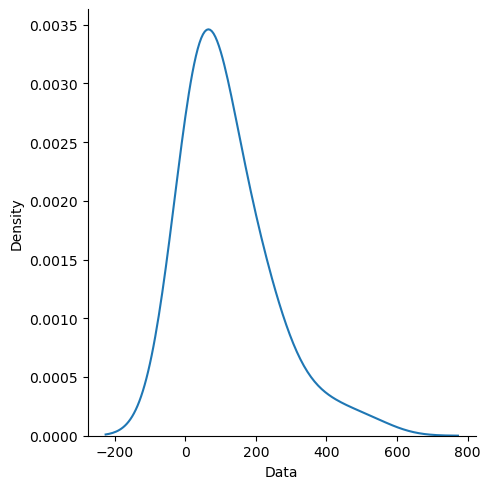

In [25]:
#this is after outliner elimination
outliner_eliminated = pd.DataFrame(outliner_eliminated)
outliner_eliminated = outliner_eliminated.rename(columns = {0:"Data"})
sns.displot(outliner_eliminated,x = "Data",kind = "kde",bw_adjust = 10)

# Matplotlib

In [26]:
import matplotlib.pyplot  as plt

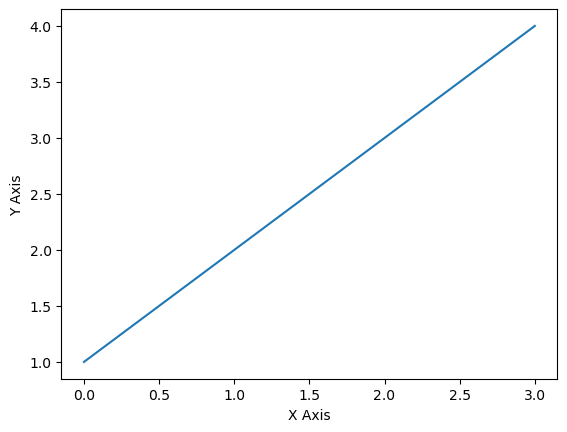

In [27]:
plt.plot([1,2,3,4])
plt.ylabel("Y Axis")
plt.xlabel("X Axis")
plt.show()

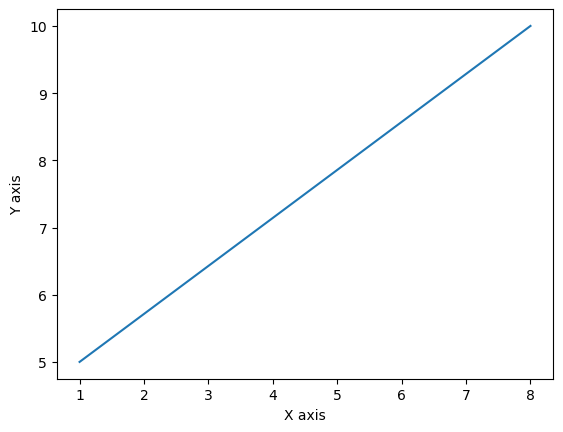

In [28]:
xpoints = np.array([1,8])
ypoints = np.array([5,10])
plt.plot(xpoints,ypoints)
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.show()

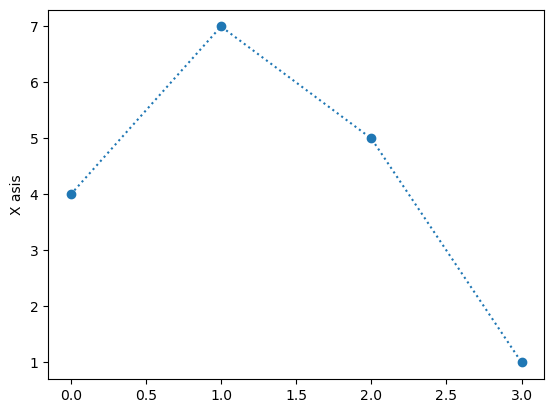

In [29]:
ypoints = np.array([4,7,5,1])
plt.plot(ypoints,linestyle= "dotted",marker = "o")
plt.ylabel("Y Axis")
plt.ylabel("X asis")
plt.show()

([<matplotlib.patches.Wedge at 0x13da758a750>,
 [Text(1.2364994836275138, 0.401334059094032, 'A'),
  Text(0.34123170317093415, 1.0457346340018885, 'B'),
  Text(-1.0462688494794532, 0.33959018626712606, 'C'),
  Text(0.34123204585151445, -1.0457345221823702, 'D')],
 [Text(0.7609227591553931, 0.24697480559632734, '9.99%'),
  Text(0.18612638354778224, 0.5704007094555754, '19.98%'),
  Text(-0.5706920997160654, 0.18523101069115963, '30.07%'),
  Text(0.18612657046446243, -0.5704006484631109, '39.96%')])

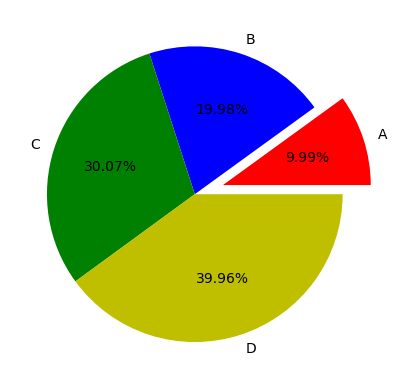

In [30]:
x = [10,20,30.1,40]
y = ["A","B","C","D"]

ab = [0.2,0,0,0]
colrs = ["r","b","g","y"]
plt.pie(x, labels =y,explode=ab,colors = colrs,autopct= "%0.2f%%")

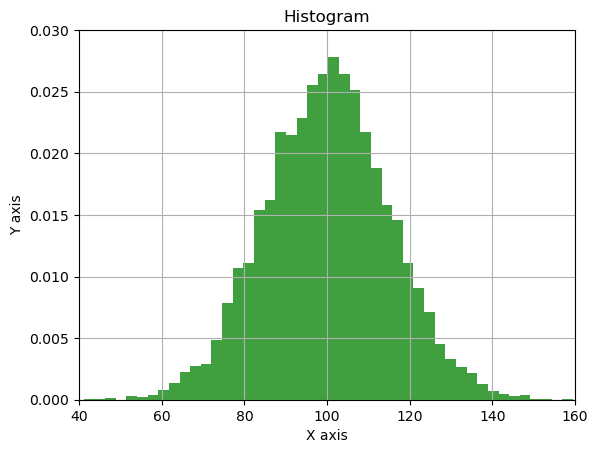

In [31]:
mu,sigma = 100,15

x = mu+sigma *np.random.randn(10000)

n,bins,patches = plt.hist(x,50,density= True,facecolor = "g",alpha = 0.75)
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Histogram")
plt.axis([40, 160, 0, 0.03])
plt.grid(True)


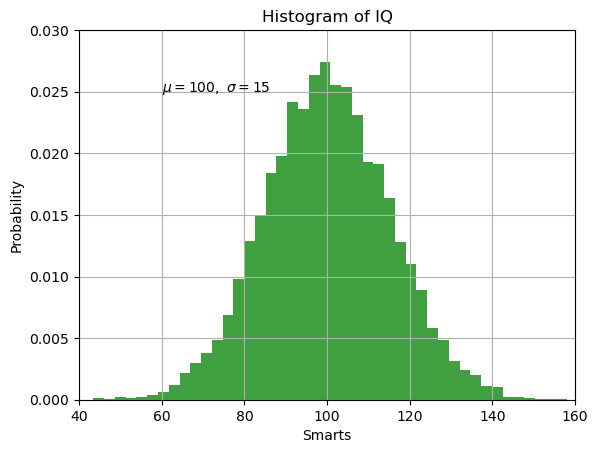

In [32]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

In [ ]:
img 